In [7]:
x <- 1:6
dim(x) <- c(2, 3)
x[1, 2]

[1] 3

In [11]:
y <- matrix(nrow = 2, ncol = 2)
y

NA,NA
NA,NA


In [27]:
z <- matrix(1:6, nrow = 2, byrow = TRUE)
z_delete <- z[-2]
print(z)
print(z_delete)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[1] 1 2 5 3 6


In [29]:
y <- matrix(1:6, nrow = 3)
y[-2]

[1] 1 3 4 5 6

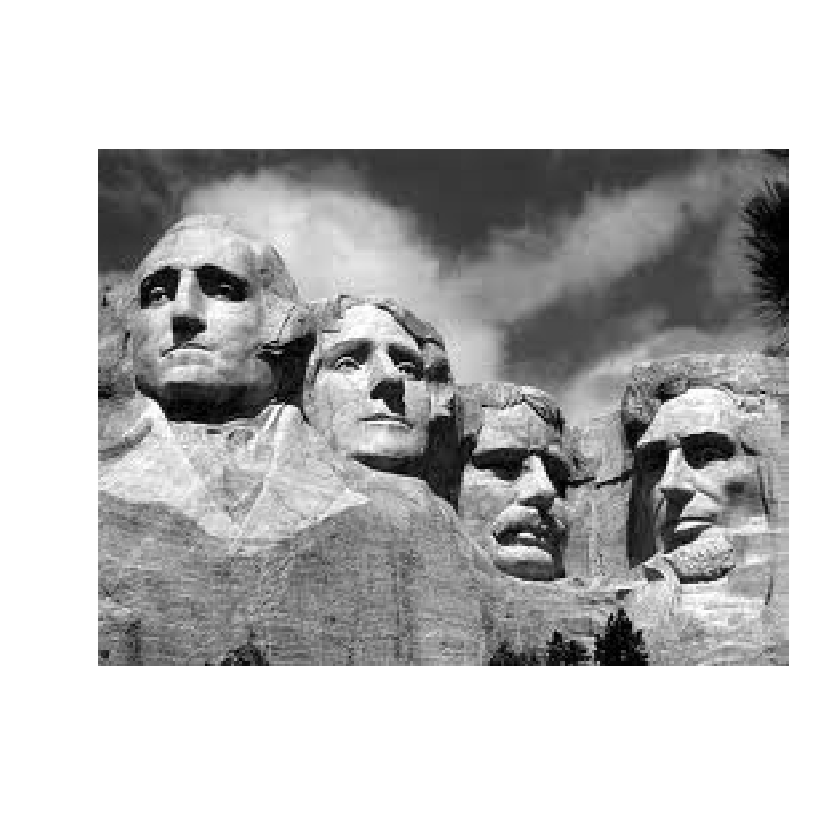

In [60]:
library(pixmap)
mtrush1 <- read.pnm('mtrush1.pgm', cellres = 1)
plot(mtrush1)

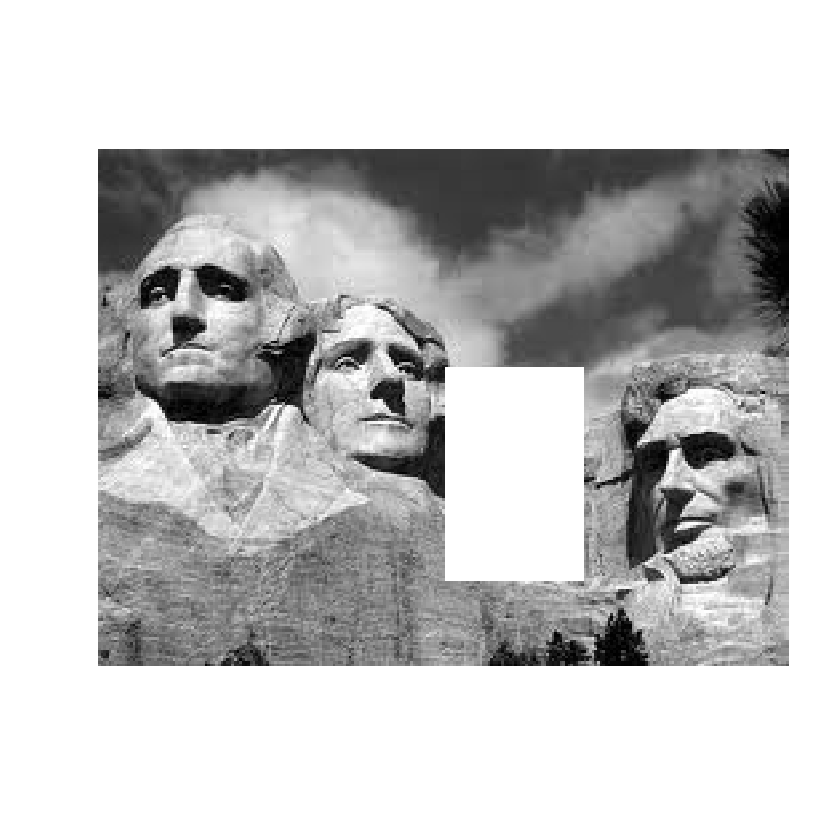

In [76]:
x_range <- 131:182
y_range <- 83:162
mtrush2 <- mtrush1
mtrush2@grey[y_range, x_range] <- 1
plot(mtrush2)

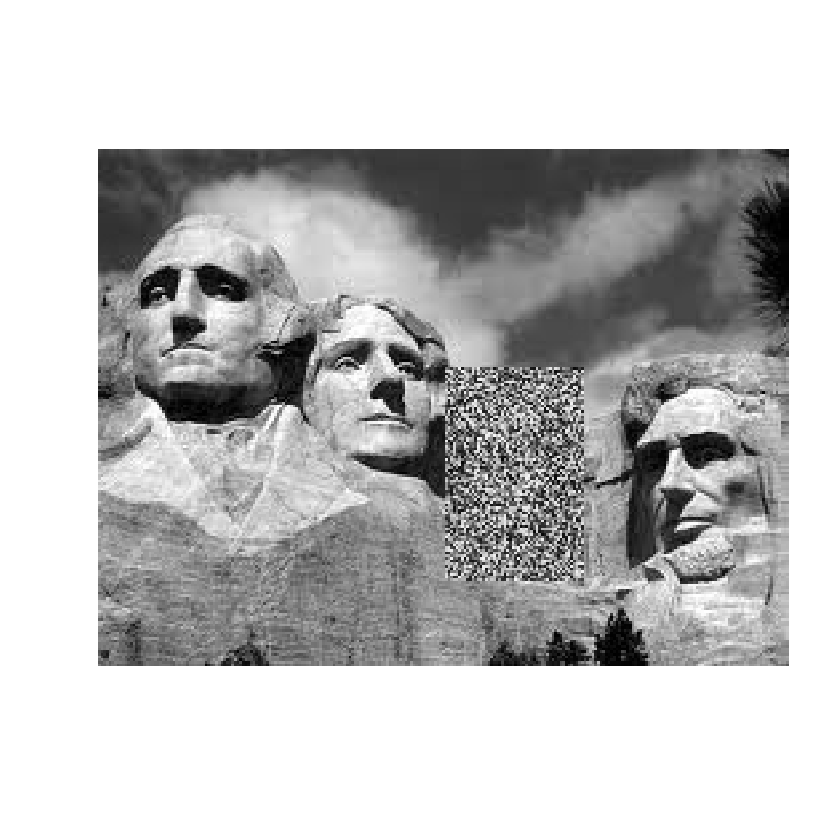

In [108]:
add_noise <- function(m, q) {
    # Add noise to a matrix by changing each matrix element aka pixel
    # to (1-q)*original intensity + q*random noise, where original intensity & random noise fall between 0 and 1
    height = dim(m)[1]
    width = dim(m)[2]
    random_noise = runif(height * width)
    return(m * (1-q) + random_noise * q)
    }

mtrush3 <- mtrush1
mtrush3@grey[y_range, x_range] <- add_noise(mtrush3@grey[y_range, x_range], 0.9)
plot(mtrush3)

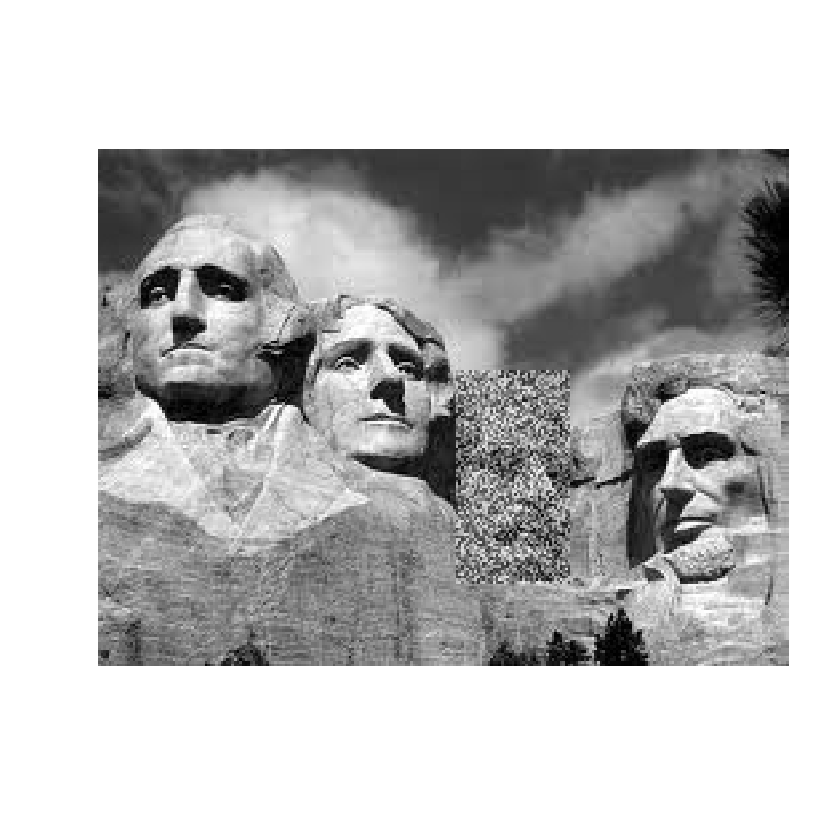

In [115]:
blurpart <- function(img, rows, cols, q) {
    lrows <- length(rows)
    lcols <- length(cols)
    newimg <- img
    randomnoise <- matrix(runif(lrows * lcols), nrow = lrows, ncol = lcols)
    newimg@grey[rows, cols] <- (1 - q) * img@grey[rows, cols] + q * randomnoise
    return(newimg)
}


mtrush3 <- blurpart(mtrush1, 84:163, 135:177, 0.65)
plot(mtrush3)

In [136]:
x <- matrix(sample(c(0,1), replace=TRUE, size=12), nrow = 2)
x

1,0,0,1,0,0
1,0,1,1,1,1


In [144]:
is_majority_one <- function(row, d) {
    if (sum(row[1:d]) >= d / 2) {
        return(1)
    } else {
        return(0)
    }
}

apply(x, 1, is_majority_one, 4)

[1] 1 1

In [160]:
find_outlier <- function(row) {
    diff_from_median = abs(row - median(row))
    which(diff_from_median == max(diff_from_median))
}

find_outlier(c(1, 4, 5, 9))

[1] 4

In [187]:
distances <- matrix(c(0, 3, 4, 3, 0, 2, 4, 2, 0), nrow = 3)
cities <- c('A', 'B', 'C')
shortest_distance <- function(m, cities) {
    min_distance <- max(distances)
    min_i <- NULL
    min_j <- NULL
    for (i in 1:dim(m)[1]) {
        for (j in 1:dim(m)[1]) {
            if (m[i, j] < min_distance && m[i, j] != 0) {
                min_i <- i
                min_j <- j
                min_distance = m[i, j]
            }
        }
    }
    
    paste('The shortest distance between cities is', min_distance, 'between', cities[min_i], 'and', cities[min_j])
}

shortest_distance(distances, cities)

[1] "The shortest distance between cities is 2 between B and C"

In [197]:
minda <- function(d) {
    smallest <- min(d)
    ij <- which(d == smallest, arr.ind=TRUE)
    ij
}

minda(distances)

row,col
1,1
2,2
3,3


In [201]:
z <- matrix(1:8, nrow = 4)
class(z)

[1] "matrix"

In [206]:
u <- 1:3
v <- as.matrix(u)
print(v)

     [,1]
[1,]    1
[2,]    2
[3,]    3


In [212]:
x <- matrix(1:12, nrow = 4)
y <- matrix(13:24, nrow = 4)
c(x, y)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24